In [1]:
import io
from datetime import timedelta
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit.circuit.library import (
    EfficientSU2,
    PauliFeatureMap,
    RealAmplitudes,
    ZFeatureMap,
    ZZFeatureMap,
    n_local,
    z_feature_map,
    zz_feature_map,
)
from qiskit_aer import AerSimulator
from qiskit_algorithms.optimizers import Optimizer
from qiskit_ibm_runtime import Sampler
from qiskit_machine_learning.algorithms import QSVC, VQC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.optimizers import COBYLA, CRS, SPSA
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.utils import algorithm_globals
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
from utils import (
    RANDOM_SEED,
    display_confussion_matrix,
    evaluate_classifier,
    get_dataset,
    show_metrics,
)

# Desarrolla una QNN

En este notebook probamos diferentes configuraciones de QNNs para poder elegir la más óptima.

Al igual que siempre, fijamos la semilla de los números aleatorios para que los resultados sean reproducibles entre ejecuciones.

In [2]:
algorithm_globals.random_seed = RANDOM_SEED

## Preprocesado del dataset

Utilizamos una función `get_dataset` del módulo `utilis.py` que hemos definido. El funcionamiento de esta función es exactamente el mismo que el de la sección de preprocesado del notebook [practica final](practica_final.ipynb).

In [3]:
X_train, y_train, X_test, y_test, X_val, y_val = get_dataset()

## Probar distintas QNN

A continuación probamos diferentes clasificadores. Estos se diferencian en `ansatz`, `feature_map` y `optimizer`.

Para ello, primero definimos una función para realizar el entrenamiento y otra para realizar la validación del clasificador.

In [4]:
def train_VQC(
    feature_map: QuantumCircuit, ansatz: QuantumCircuit, optimizer: Optimizer
) -> VQC:
    global X_train, y_train

    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=LossLogger().log_loss,
        sampler=Sampler(AerSimulator()),
    )

    start = time()
    vqc.fit(X_train, y_train.values)
    total_time = time() - start
    print(f"Tiempo total de entrenamiento: {timedelta(seconds=total_time)}")

    return vqc


class LossLogger:
    def __init__(self):
        self._iteration = 0

    def log_loss(self, weights, obj_func_eval):
        self._iteration += 1
        print(f"Iteración {self._iteration} - Loss: {obj_func_eval:.4f}")

In [5]:
number_of_features = X_train.shape[1]

Con esto ya podemos probar diferentes configuraciones:

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0742
Iteración 2 - Loss: 1.6091
Iteración 3 - Loss: 1.0013
Iteración 4 - Loss: 1.0268
Iteración 5 - Loss: 1.0336
Iteración 6 - Loss: 1.0004
Iteración 7 - Loss: 0.9995
Iteración 8 - Loss: 1.0014
Iteración 9 - Loss: 0.9966
Iteración 10 - Loss: 1.4506
Iteración 11 - Loss: 0.9924
Iteración 12 - Loss: 0.9797
Iteración 13 - Loss: 0.9791
Iteración 14 - Loss: 0.9782
Iteración 15 - Loss: 0.9738
Iteración 16 - Loss: 0.9784
Iteración 17 - Loss: 0.9776
Iteración 18 - Loss: 0.9964
Iteración 19 - Loss: 1.0196
Iteración 20 - Loss: 0.9758
Tiempo total de entrenamiento: 0:01:35.865609
--- Resultados para entrenamiento ---
Accuracy: 0.5931
Precision: 0.0000
--- Resultados para test ---
Accuracy: 0.5900
Precision: 0.0000


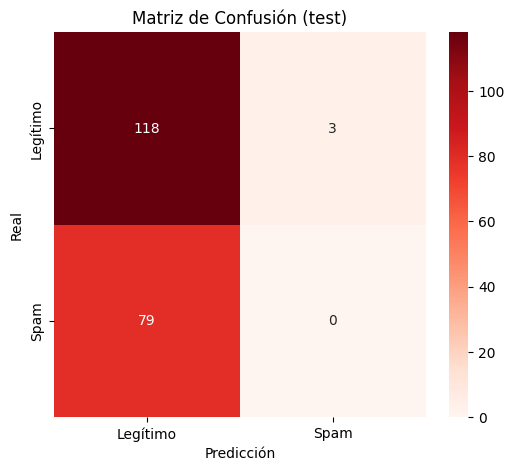

None

In [6]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9663
Iteración 2 - Loss: 0.9765
Iteración 3 - Loss: 0.9574
Iteración 4 - Loss: 0.9567
Iteración 5 - Loss: 0.9552
Iteración 6 - Loss: 0.9601
Iteración 7 - Loss: 0.9566
Iteración 8 - Loss: 0.9570
Iteración 9 - Loss: 0.9566
Iteración 10 - Loss: 0.9819
Iteración 11 - Loss: 0.9491
Iteración 12 - Loss: 0.9538
Iteración 13 - Loss: 0.9478
Iteración 14 - Loss: 0.9509
Iteración 15 - Loss: 0.9510
Iteración 16 - Loss: 0.9515
Iteración 17 - Loss: 0.9492
Iteración 18 - Loss: 0.9572
Iteración 19 - Loss: 0.9497
Iteración 20 - Loss: 0.9492
Tiempo total de entrenamiento: 0:03:02.457285
--- Resultados para entrenamiento ---
Accuracy: 0.6139
Precision: 0.5152
--- Resultados para test ---
Accuracy: 0.6550
Precision: 0.5926


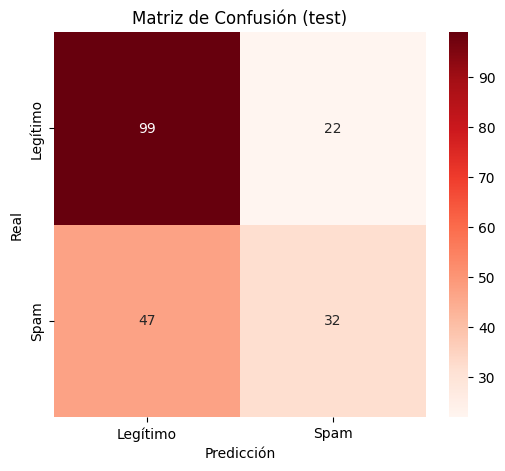

None

In [7]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9578
Iteración 2 - Loss: 0.9988
Iteración 3 - Loss: 0.9571
Iteración 4 - Loss: 0.9589
Iteración 5 - Loss: 0.9623
Iteración 6 - Loss: 0.9575
Iteración 7 - Loss: 0.9610
Iteración 8 - Loss: 0.9568
Iteración 9 - Loss: 0.9576
Iteración 10 - Loss: 1.0126
Iteración 11 - Loss: 0.9600
Iteración 12 - Loss: 0.9611
Iteración 13 - Loss: 0.9618
Iteración 14 - Loss: 0.9572
Iteración 15 - Loss: 0.9593
Iteración 16 - Loss: 0.9586
Iteración 17 - Loss: 0.9561
Iteración 18 - Loss: 0.9732
Iteración 19 - Loss: 0.9593
Iteración 20 - Loss: 0.9566
Tiempo total de entrenamiento: 0:03:06.823433
--- Resultados para entrenamiento ---
Accuracy: 0.6208
Precision: 0.5165
--- Resultados para test ---
Accuracy: 0.6450
Precision: 0.5526


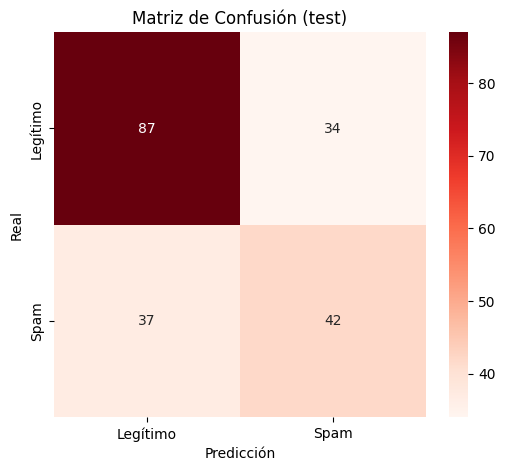

None

In [8]:
feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(number_of_features).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0215
Iteración 2 - Loss: 1.0557
Iteración 3 - Loss: 1.0168
Iteración 4 - Loss: 1.0230
Iteración 5 - Loss: 1.0184
Iteración 6 - Loss: 1.0189
Iteración 7 - Loss: 1.0155
Iteración 8 - Loss: 1.0151
Iteración 9 - Loss: 1.0153
Iteración 10 - Loss: 1.0816
Iteración 11 - Loss: 1.0132
Iteración 12 - Loss: 1.0168
Iteración 13 - Loss: 1.0141
Iteración 14 - Loss: 1.0213
Iteración 15 - Loss: 1.0154
Iteración 16 - Loss: 1.0145
Iteración 17 - Loss: 1.0131
Iteración 18 - Loss: 1.0011
Iteración 19 - Loss: 1.0031
Iteración 20 - Loss: 1.0047
Tiempo total de entrenamiento: 0:03:05.640529
--- Resultados para entrenamiento ---
Accuracy: 0.5264
Precision: 0.3755
--- Resultados para test ---
Accuracy: 0.5350
Precision: 0.4028


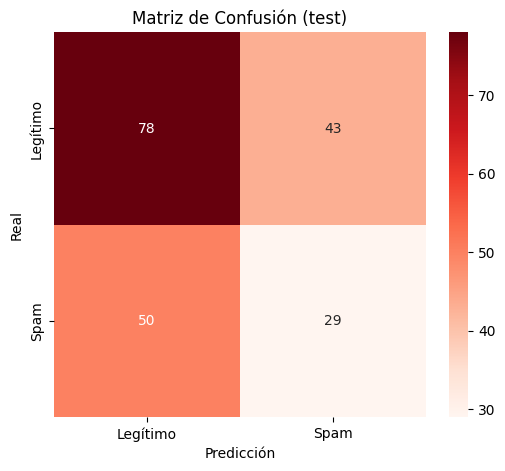

None

In [9]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0915
Iteración 2 - Loss: 1.7699
Iteración 3 - Loss: 1.0686
Iteración 4 - Loss: 1.0860
Iteración 5 - Loss: 1.1504
Iteración 6 - Loss: 1.0703
Iteración 7 - Loss: 1.0703
Iteración 8 - Loss: 1.0713
Iteración 9 - Loss: 1.0739
Iteración 10 - Loss: 1.7997
Iteración 11 - Loss: 0.9750
Iteración 12 - Loss: 0.9733
Iteración 13 - Loss: 0.9732
Iteración 14 - Loss: 0.9749
Iteración 15 - Loss: 0.9737
Iteración 16 - Loss: 0.9732
Iteración 17 - Loss: 0.9753
Iteración 18 - Loss: 1.1231
Iteración 19 - Loss: 0.9839
Iteración 20 - Loss: 0.9753
Tiempo total de entrenamiento: 0:01:36.967028
--- Resultados para entrenamiento ---
Accuracy: 0.5750
Precision: 0.0000
--- Resultados para test ---
Accuracy: 0.5650
Precision: 0.0000


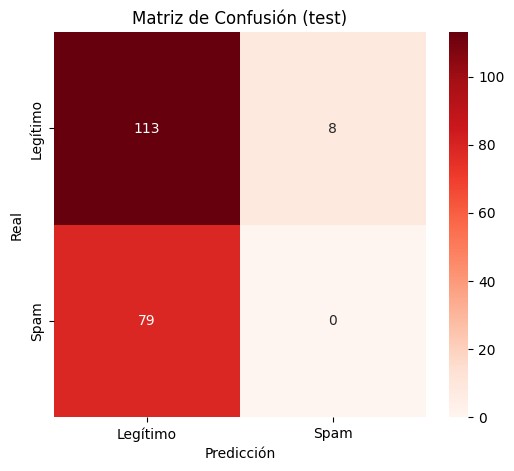

None

In [10]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:14:17.458764
--- Resultados para entrenamiento ---
Accuracy: 0.6694
Precision: 0.6533
--- Resultados para test ---
Accuracy: 0.6800
Precision: 0.6744


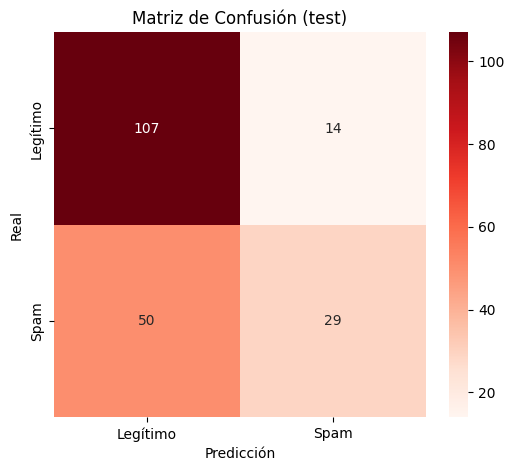

None

In [11]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:07:24.352221
--- Resultados para entrenamiento ---
Accuracy: 0.5889
Precision: 0.1250
--- Resultados para test ---
Accuracy: 0.6000
Precision: 0.0000


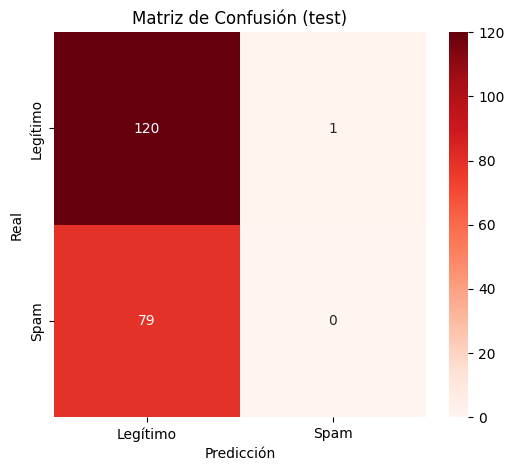

None

In [12]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

## Análisis de los resultados

En la siguiente tabla mostramos los resultados obtenidos con las diferentes configuraciones:

| *Feature Map*    | ***Ansatz***      | ***Optimizer*** | ***Accuracy (train)*** | ***Precision (train)*** | ***Accuracy (test)*** | ***Precision (test)*** |
| ---------------- | ----------------- | --------------- | ---------------------- | ----------------------- | --------------------- | ---------------------- |
| `z_feature_map`  | `n_local`         | `COBYLA`        | 0.5931                 | 0.0000                  | 0.5900                | 0.0000                 |
| `zz_feature_map` | `n_local`         | `COBYLA`        | 0.6139                 | 0.5152                  | 0.6550                | 0.5926                 |
| `zz_feature_map` | `RealAmplitudes`  | `COBYLA`        | 0.6208                 | 0.5165                  | 0.6450                | 0.5526                 |
| `zz_feature_map` | `n_local(reps=3)` | `COBYLA`        | 0.5264                 | 0.3755                  | 0.5350                | 0.4028                 |
| `z_feature_map`  | `n_local(reps=3)` | `COBYLA`        | 0.5750                 | 0.0000                  | 0.5650                | 0.0000                 |
| `zz_feature_map` | `n_local`         | `SPSA`          | 0.6694                 | 0.6533                  | 0.6800                | 0.6744                 |
| `z_feature_map`  | `n_local`         | `SPSA`          | 0.5889                 | 0.1250                  | 0.6000                | 0.0000                 |

Vemos que `z_feature_map` produce muy malos resultados, pues tiende a clasificar todo como negativo (como correo legítimo), mientras que con `zz_feature_map` ya obtenemos resultados más correctos, aunque siguen siendo muy malos, siendo el mejor modelo aquel que utiliza el optimizador `SPSA`, con un 68% de accuracy y un 67.44% de precision en test.

## Segunda iteración

### Probar diferentes reps con SPSA

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:13:24.615144
--- Resultados para entrenamiento ---
Accuracy: 0.6681
Precision: 0.5801
--- Resultados para test ---
Accuracy: 0.6750
Precision: 0.5921


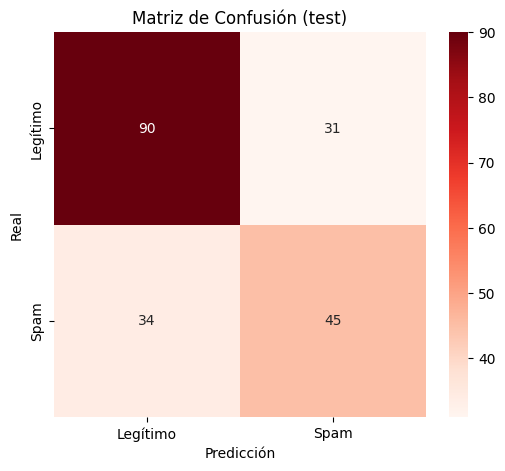

None

In [6]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=2)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:14:00.092065
--- Resultados para entrenamiento ---
Accuracy: 0.6750
Precision: 0.6923
--- Resultados para test ---
Accuracy: 0.6950
Precision: 0.7500


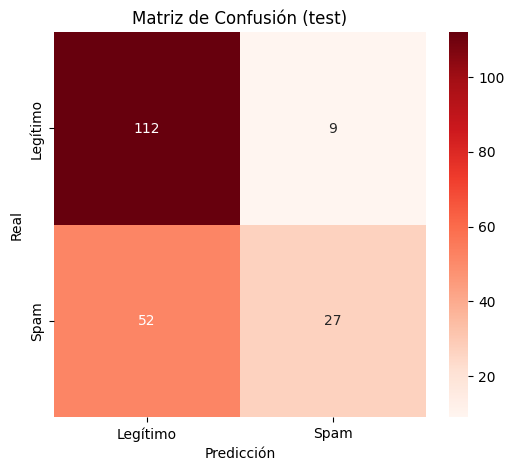

None

In [7]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:14:27.863974
--- Resultados para entrenamiento ---
Accuracy: 0.6903
Precision: 0.6743
--- Resultados para test ---
Accuracy: 0.7050
Precision: 0.7174


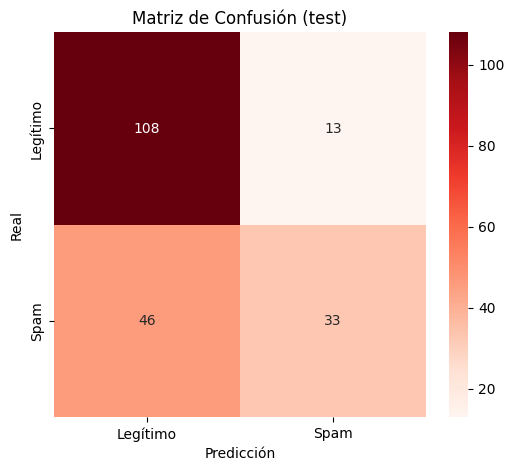

None

In [6]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=4)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:14:58.909240
--- Resultados para entrenamiento ---
Accuracy: 0.6153
Precision: 0.5467
--- Resultados para test ---
Accuracy: 0.6300
Precision: 0.6087


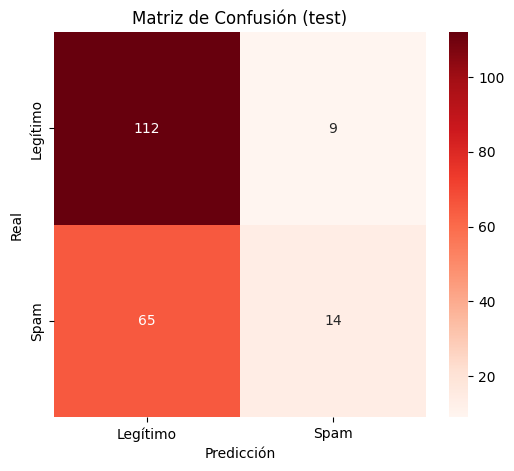

None

In [7]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=5)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### Probar SPSA con diferentes `maxiter`

En `COBYLA` no tiene mucho sentido probarlo ya que el callback no muestra que mejoren los resultados a lo largo de las iteraciones. Sin embargo, con `SPSA` el callback no funciona, por lo que tiene sentido probar explícitamente a modificar `maxiter`.

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:10:50.977340
--- Resultados para entrenamiento ---
Accuracy: 0.6222
Precision: 0.5429
--- Resultados para test ---
Accuracy: 0.6100
Precision: 0.5143


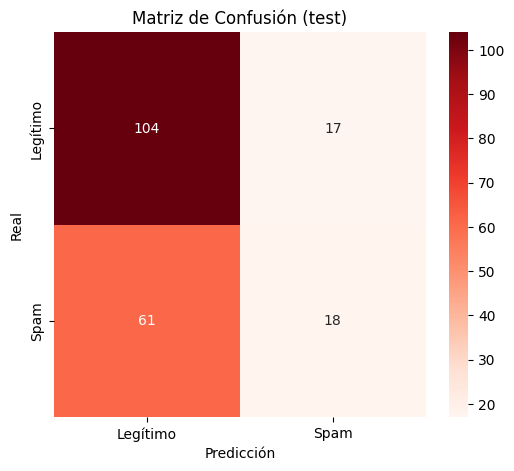

None

In [8]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=10)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:17:00.117546
--- Resultados para entrenamiento ---
Accuracy: 0.6389
Precision: 0.5857
--- Resultados para test ---
Accuracy: 0.6050
Precision: 0.5000


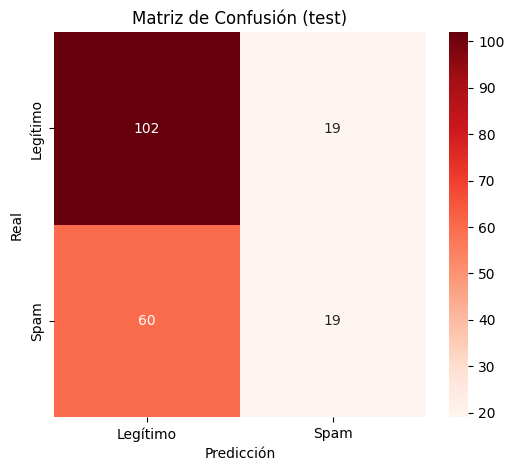

None

In [9]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=30)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### Probar distintas opciones de entrelazamiento con SPSA

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:13:57.316847
--- Resultados para entrenamiento ---
Accuracy: 0.6333
Precision: 0.5769
--- Resultados para test ---
Accuracy: 0.5950
Precision: 0.4722


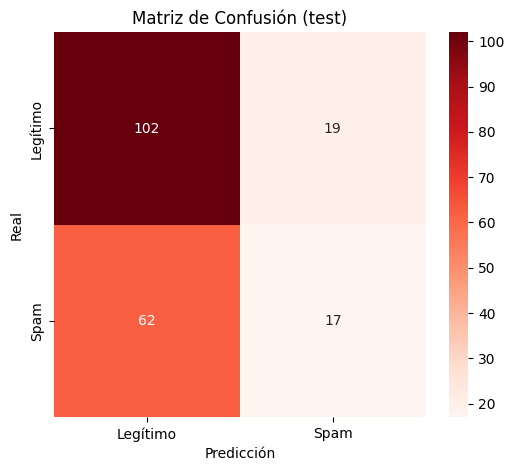

None

In [10]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "reverse_linear")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:13:54.476017
--- Resultados para entrenamiento ---
Accuracy: 0.5944
Precision: 0.4355
--- Resultados para test ---
Accuracy: 0.5450
Precision: 0.2273


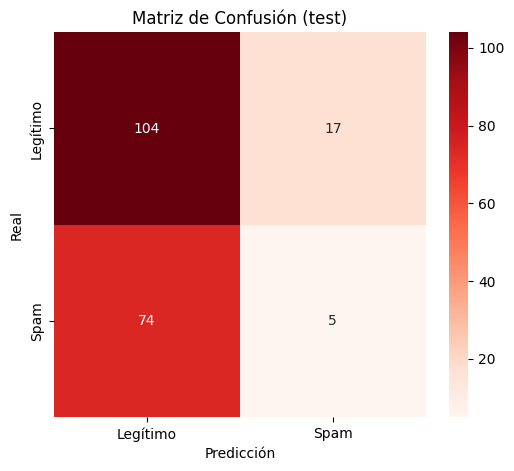

None

In [11]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "pairwise")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:13:59.606396
--- Resultados para entrenamiento ---
Accuracy: 0.5875
Precision: 0.4714
--- Resultados para test ---
Accuracy: 0.6300
Precision: 0.5472


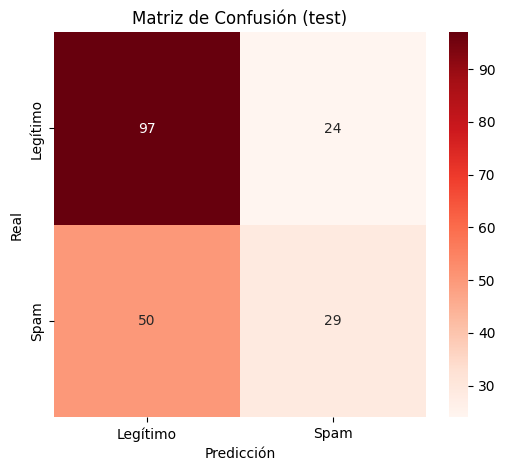

None

In [12]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "sca")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:15:39.858552
--- Resultados para entrenamiento ---
Accuracy: 0.6389
Precision: 0.5531
--- Resultados para test ---
Accuracy: 0.5750
Precision: 0.4483


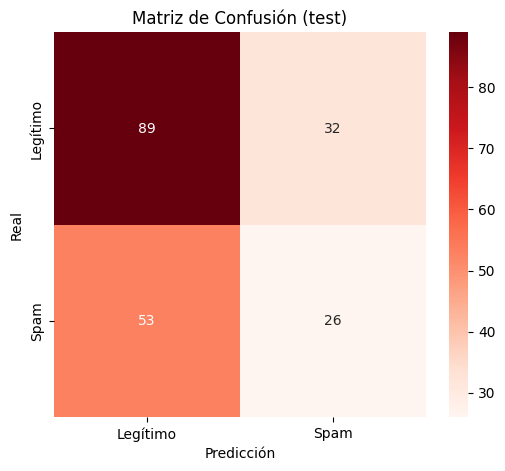

None

In [13]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "full")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### Probar distintas opciones de entrelazamiento con COBYLA

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0051
Iteración 2 - Loss: 1.0469
Iteración 3 - Loss: 0.9979
Iteración 4 - Loss: 1.0021
Iteración 5 - Loss: 1.0030
Iteración 6 - Loss: 1.0031
Iteración 7 - Loss: 0.9995
Iteración 8 - Loss: 1.0020
Iteración 9 - Loss: 1.0005
Iteración 10 - Loss: 1.0429
Iteración 11 - Loss: 0.9775
Iteración 12 - Loss: 0.9774
Iteración 13 - Loss: 0.9812
Iteración 14 - Loss: 0.9786
Iteración 15 - Loss: 0.9804
Iteración 16 - Loss: 0.9802
Iteración 17 - Loss: 0.9769
Iteración 18 - Loss: 1.0031
Iteración 19 - Loss: 0.9760
Iteración 20 - Loss: 0.9758
Tiempo total de entrenamiento: 0:02:29.333123
--- Resultados para entrenamiento ---
Accuracy: 0.5444
Precision: 0.4337
--- Resultados para test ---
Accuracy: 0.5000
Precision: 0.3895


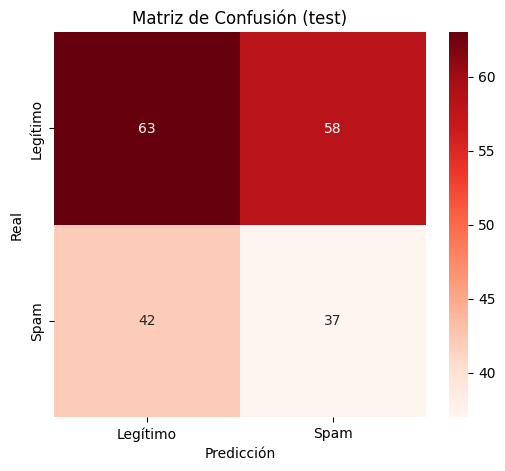

None

In [15]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9813
Iteración 2 - Loss: 1.0114
Iteración 3 - Loss: 0.9736
Iteración 4 - Loss: 0.9749
Iteración 5 - Loss: 0.9731
Iteración 6 - Loss: 0.9753
Iteración 7 - Loss: 0.9711
Iteración 8 - Loss: 0.9698
Iteración 9 - Loss: 0.9688
Iteración 10 - Loss: 0.9626
Iteración 11 - Loss: 0.9570
Iteración 12 - Loss: 0.9660
Iteración 13 - Loss: 0.9577
Iteración 14 - Loss: 0.9668
Iteración 15 - Loss: 0.9615
Iteración 16 - Loss: 0.9588
Iteración 17 - Loss: 0.9610
Iteración 18 - Loss: 0.9923
Iteración 19 - Loss: 0.9625
Iteración 20 - Loss: 0.9619
Tiempo total de entrenamiento: 0:02:24.336941
--- Resultados para entrenamiento ---
Accuracy: 0.6208
Precision: 0.5294
--- Resultados para test ---
Accuracy: 0.5900
Precision: 0.4762


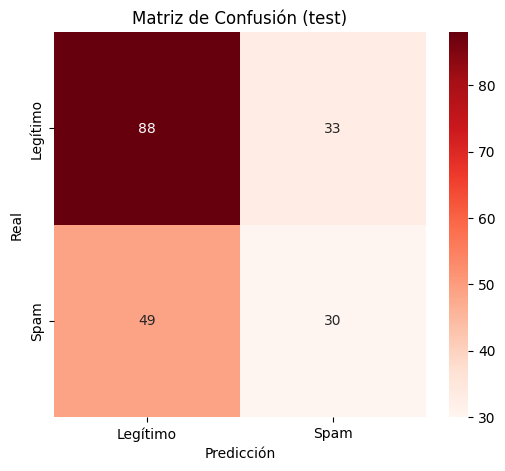

None

In [16]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "reverse_linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9605
Iteración 2 - Loss: 0.9776
Iteración 3 - Loss: 0.9655
Iteración 4 - Loss: 0.9719
Iteración 5 - Loss: 0.9578
Iteración 6 - Loss: 0.9609
Iteración 7 - Loss: 0.9577
Iteración 8 - Loss: 0.9582
Iteración 9 - Loss: 0.9602
Iteración 10 - Loss: 1.0146
Iteración 11 - Loss: 0.9442
Iteración 12 - Loss: 0.9447
Iteración 13 - Loss: 0.9433
Iteración 14 - Loss: 0.9446
Iteración 15 - Loss: 0.9429
Iteración 16 - Loss: 0.9439
Iteración 17 - Loss: 0.9454
Iteración 18 - Loss: 0.9366
Iteración 19 - Loss: 0.9341
Iteración 20 - Loss: 0.9344
Tiempo total de entrenamiento: 0:02:27.013432
--- Resultados para entrenamiento ---
Accuracy: 0.6681
Precision: 0.5918
--- Resultados para test ---
Accuracy: 0.6300
Precision: 0.5362


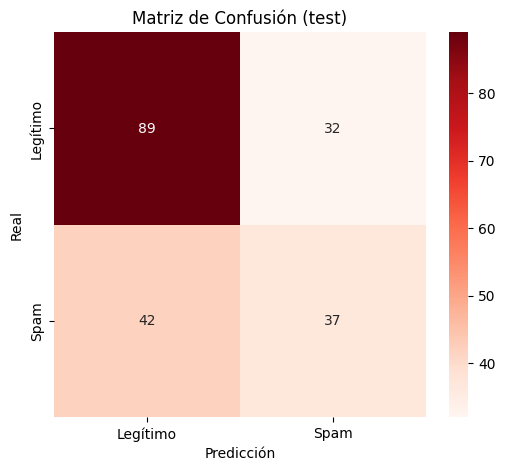

None

In [17]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "pairwise")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0387
Iteración 2 - Loss: 1.0453
Iteración 3 - Loss: 1.0559
Iteración 4 - Loss: 1.0124
Iteración 5 - Loss: 0.9982
Iteración 6 - Loss: 0.9837
Iteración 7 - Loss: 0.9864
Iteración 8 - Loss: 1.0002
Iteración 9 - Loss: 0.9735
Iteración 10 - Loss: 0.9847
Iteración 11 - Loss: 0.9893
Iteración 12 - Loss: 0.9716
Iteración 13 - Loss: 0.9721
Iteración 14 - Loss: 0.9708
Iteración 15 - Loss: 0.9819
Iteración 16 - Loss: 0.9825
Iteración 17 - Loss: 0.9913
Iteración 18 - Loss: 1.0013
Iteración 19 - Loss: 0.9489
Iteración 20 - Loss: 0.9503
Tiempo total de entrenamiento: 0:02:27.919291
--- Resultados para entrenamiento ---
Accuracy: 0.6306
Precision: 0.5652
--- Resultados para test ---
Accuracy: 0.6400
Precision: 0.5897


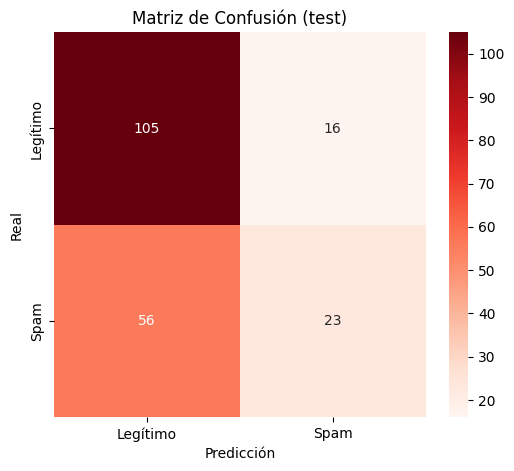

None

In [18]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "sca")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0134
Iteración 2 - Loss: 1.0357
Iteración 3 - Loss: 1.0106
Iteración 4 - Loss: 1.0092
Iteración 5 - Loss: 1.0213
Iteración 6 - Loss: 0.9838
Iteración 7 - Loss: 0.9813
Iteración 8 - Loss: 0.9893
Iteración 9 - Loss: 0.9902
Iteración 10 - Loss: 1.0143
Iteración 11 - Loss: 0.9861
Iteración 12 - Loss: 0.9875
Iteración 13 - Loss: 0.9709
Iteración 14 - Loss: 0.9792
Iteración 15 - Loss: 0.9773
Iteración 16 - Loss: 0.9716
Iteración 17 - Loss: 0.9786
Iteración 18 - Loss: 0.9844
Iteración 19 - Loss: 0.9716
Iteración 20 - Loss: 0.9851
Tiempo total de entrenamiento: 0:02:47.729613
--- Resultados para entrenamiento ---
Accuracy: 0.5917
Precision: 0.4777
--- Resultados para test ---
Accuracy: 0.5300
Precision: 0.3810


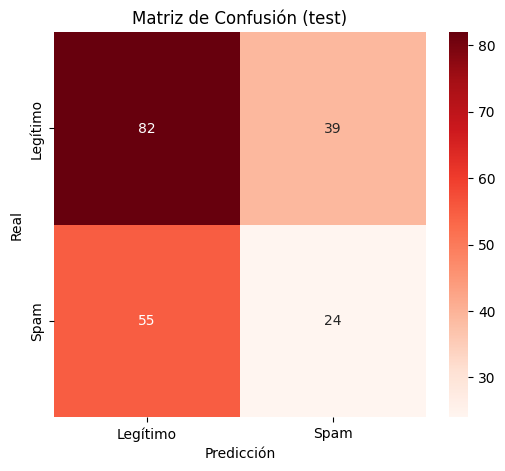

None

In [19]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "full")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

## Probar diferentes `ansatz`

### RealAmplitudes

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0440
Iteración 2 - Loss: 1.0057
Iteración 3 - Loss: 1.0142
Iteración 4 - Loss: 1.0157
Iteración 5 - Loss: 1.0080
Iteración 6 - Loss: 1.0051
Iteración 7 - Loss: 1.0045
Iteración 8 - Loss: 1.0037
Iteración 9 - Loss: 1.0039
Iteración 10 - Loss: 1.0003
Iteración 11 - Loss: 1.0239
Iteración 12 - Loss: 1.0364
Iteración 13 - Loss: 1.0048
Iteración 14 - Loss: 1.0024
Iteración 15 - Loss: 1.0024
Iteración 16 - Loss: 1.0015
Iteración 17 - Loss: 1.0032
Iteración 18 - Loss: 0.9105
Iteración 19 - Loss: 0.9164
Iteración 20 - Loss: 0.9106
Tiempo total de entrenamiento: 0:02:30.406138
--- Resultados para entrenamiento ---
Accuracy: 0.7264
Precision: 0.7377
--- Resultados para test ---
Accuracy: 0.7150
Precision: 0.7391


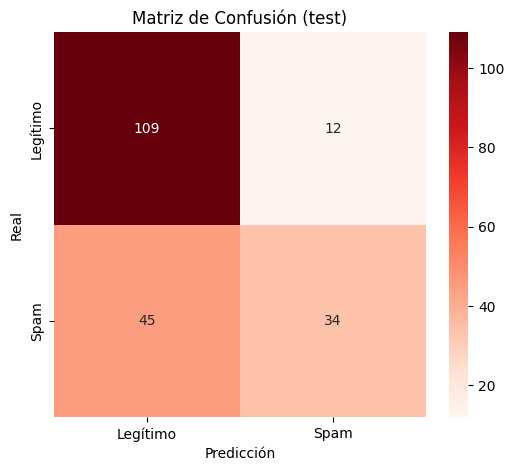

None

In [21]:
feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(num_qubits=number_of_features, entanglement="linear").decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9763
Iteración 2 - Loss: 0.9922
Iteración 3 - Loss: 0.9846
Iteración 4 - Loss: 0.9406
Iteración 5 - Loss: 0.9413
Iteración 6 - Loss: 0.9345
Iteración 7 - Loss: 0.9396
Iteración 8 - Loss: 0.9342
Iteración 9 - Loss: 0.9318
Iteración 10 - Loss: 0.9905
Iteración 11 - Loss: 0.9492
Iteración 12 - Loss: 0.9640
Iteración 13 - Loss: 0.9463
Iteración 14 - Loss: 0.9337
Iteración 15 - Loss: 0.9364
Iteración 16 - Loss: 0.9374
Iteración 17 - Loss: 0.9377
Iteración 18 - Loss: 0.9604
Iteración 19 - Loss: 0.9358
Iteración 20 - Loss: 0.9331
Tiempo total de entrenamiento: 0:02:41.683602
--- Resultados para entrenamiento ---
Accuracy: 0.6764
Precision: 0.5948
--- Resultados para test ---
Accuracy: 0.6700
Precision: 0.5867


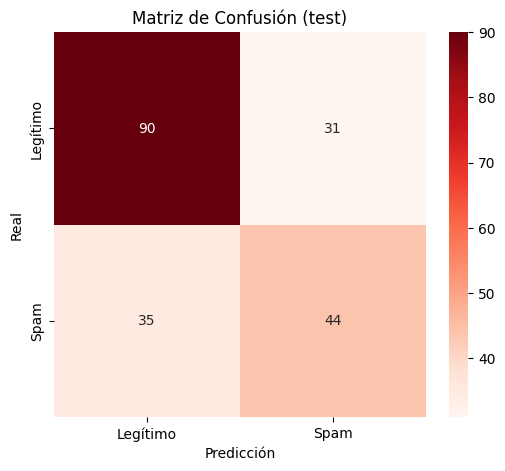

None

In [25]:
feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(num_qubits=number_of_features, reps=4, entanglement="linear").decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### EfficientSU2

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0218
Iteración 2 - Loss: 1.0240
Iteración 3 - Loss: 0.9931
Iteración 4 - Loss: 0.9908
Iteración 5 - Loss: 0.9879
Iteración 6 - Loss: 0.9883
Iteración 7 - Loss: 0.9894
Iteración 8 - Loss: 0.9915
Iteración 9 - Loss: 0.9897
Iteración 10 - Loss: 0.9670
Iteración 11 - Loss: 0.9550
Iteración 12 - Loss: 0.9662
Iteración 13 - Loss: 0.9537
Iteración 14 - Loss: 0.9595
Iteración 15 - Loss: 0.9528
Iteración 16 - Loss: 0.9552
Iteración 17 - Loss: 0.9537
Iteración 18 - Loss: 0.9514
Iteración 19 - Loss: 0.9510
Iteración 20 - Loss: 0.9635
Tiempo total de entrenamiento: 0:02:46.791074
--- Resultados para entrenamiento ---
Accuracy: 0.6292
Precision: 0.5680
--- Resultados para test ---
Accuracy: 0.5900
Precision: 0.4545


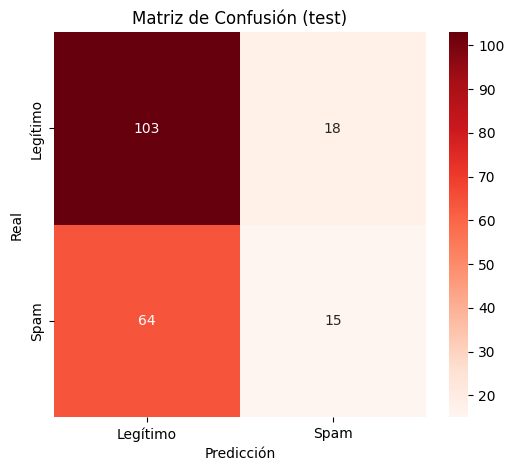

None

In [26]:
feature_map = zz_feature_map(number_of_features)
ansatz = EfficientSU2(
    num_qubits=number_of_features, entanglement="linear", su2_gates=["ry", "rz"]
).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9871
Iteración 2 - Loss: 1.0062
Iteración 3 - Loss: 0.9877
Iteración 4 - Loss: 0.9807
Iteración 5 - Loss: 0.9827
Iteración 6 - Loss: 0.9794
Iteración 7 - Loss: 0.9764
Iteración 8 - Loss: 0.9790
Iteración 9 - Loss: 0.9814
Iteración 10 - Loss: 0.9690
Iteración 11 - Loss: 0.9573
Iteración 12 - Loss: 0.9877
Iteración 13 - Loss: 0.9575
Iteración 14 - Loss: 0.9554
Iteración 15 - Loss: 0.9563
Iteración 16 - Loss: 0.9572
Iteración 17 - Loss: 0.9569
Iteración 18 - Loss: 0.9697
Iteración 19 - Loss: 0.9470
Iteración 20 - Loss: 0.9522
Tiempo total de entrenamiento: 0:02:42.859833
--- Resultados para entrenamiento ---
Accuracy: 0.6292
Precision: 0.5491
--- Resultados para test ---
Accuracy: 0.6550
Precision: 0.6136


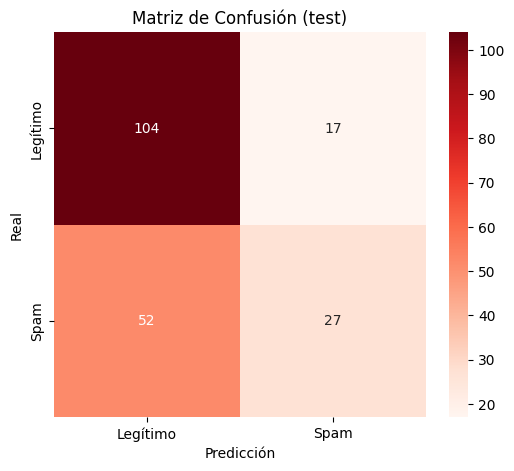

None

In [28]:
feature_map = zz_feature_map(number_of_features)
ansatz = EfficientSU2(
    num_qubits=number_of_features, reps=2, entanglement="linear", su2_gates=["ry", "rz"]
).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

## Tercera iteración

Pruebo zz_feature_map con más reps cogiendo de base un modelo que funcionaba relativamente bien.

Modelo original:

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0440
Iteración 2 - Loss: 1.0057
Iteración 3 - Loss: 1.0142
Iteración 4 - Loss: 1.0157
Iteración 5 - Loss: 1.0080
Iteración 6 - Loss: 1.0051
Iteración 7 - Loss: 1.0045
Iteración 8 - Loss: 1.0037
Iteración 9 - Loss: 1.0039
Iteración 10 - Loss: 1.0003
Iteración 11 - Loss: 1.0239
Iteración 12 - Loss: 1.0364
Iteración 13 - Loss: 1.0048
Iteración 14 - Loss: 1.0024
Iteración 15 - Loss: 1.0024
Iteración 16 - Loss: 1.0015
Iteración 17 - Loss: 1.0032
Iteración 18 - Loss: 0.9105
Iteración 19 - Loss: 0.9164
Iteración 20 - Loss: 0.9106
Tiempo total de entrenamiento: 0:02:30.406138
--- Resultados para entrenamiento ---
Accuracy: 0.7264
Precision: 0.7377
--- Resultados para test ---
Accuracy: 0.7150
Precision: 0.7391


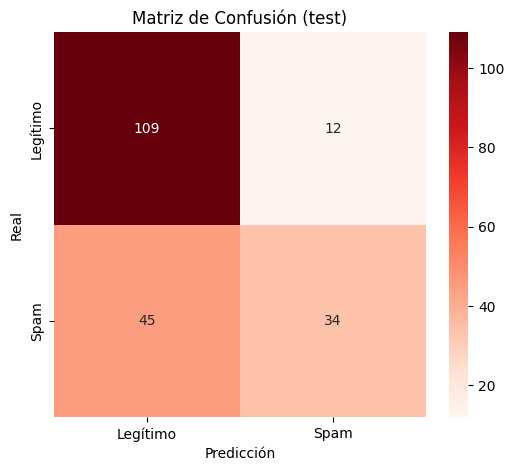

None

In [21]:
feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(num_qubits=number_of_features, entanglement="linear").decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

Para empezar le meto más iteraciones, que parece que este iba por buen camino:

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9823
Iteración 2 - Loss: 1.0175
Iteración 3 - Loss: 0.9728
Iteración 4 - Loss: 0.9659
Iteración 5 - Loss: 0.9671
Iteración 6 - Loss: 0.9649
Iteración 7 - Loss: 0.9658
Iteración 8 - Loss: 0.9651
Iteración 9 - Loss: 0.9647
Iteración 10 - Loss: 1.0080
Iteración 11 - Loss: 0.9492
Iteración 12 - Loss: 0.9489
Iteración 13 - Loss: 0.9523
Iteración 14 - Loss: 0.9489
Iteración 15 - Loss: 0.9525
Iteración 16 - Loss: 0.9517
Iteración 17 - Loss: 0.9512
Iteración 18 - Loss: 0.9798
Iteración 19 - Loss: 0.9519
Iteración 20 - Loss: 0.9519
Iteración 21 - Loss: 0.9507
Iteración 22 - Loss: 0.9502
Iteración 23 - Loss: 0.9528
Iteración 24 - Loss: 0.9539
Iteración 25 - Loss: 0.9543
Iteración 26 - Loss: 0.9531
Iteración 27 - Loss: 0.9526
Iteración 28 - Loss: 0.9530
Iteración 29 - Loss: 0.9498
Iteración 30 - Loss: 0.9546
Iteración 31 - Loss: 0.9542
Iteración 32 - Loss: 0.9484
Iteración 33 - Loss: 0.9529
Iteración 34 - Loss: 0.9716
Iteración 35 - Loss: 0.9574
Iteración 36 - Loss: 0.9619
I

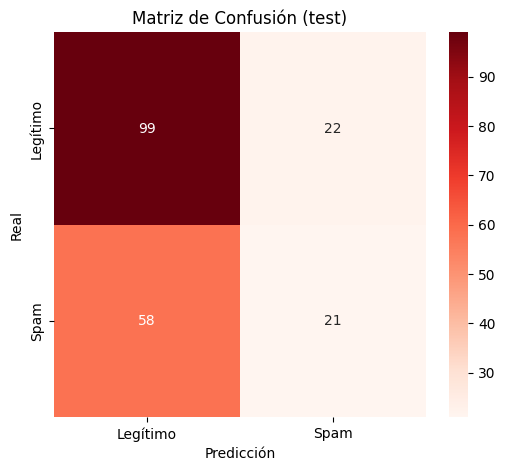

None

In [29]:
feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(num_qubits=number_of_features, entanglement="linear").decompose()
optimizer = COBYLA(maxiter=40)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0962
Iteración 2 - Loss: 1.0636
Iteración 3 - Loss: 1.0685
Iteración 4 - Loss: 1.0762
Iteración 5 - Loss: 1.0566
Iteración 6 - Loss: 1.0603
Iteración 7 - Loss: 1.0557
Iteración 8 - Loss: 1.0578
Iteración 9 - Loss: 1.0591
Iteración 10 - Loss: 1.0903
Iteración 11 - Loss: 1.0520
Iteración 12 - Loss: 1.0539
Iteración 13 - Loss: 1.0507
Iteración 14 - Loss: 1.0500
Iteración 15 - Loss: 1.0506
Iteración 16 - Loss: 1.0502
Iteración 17 - Loss: 1.0511
Iteración 18 - Loss: 1.0449
Iteración 19 - Loss: 1.0351
Iteración 20 - Loss: 1.0365
Tiempo total de entrenamiento: 0:03:09.812926
--- Resultados para entrenamiento ---
Accuracy: 0.4597
Precision: 0.2973
--- Resultados para test ---
Accuracy: 0.5000
Precision: 0.3433


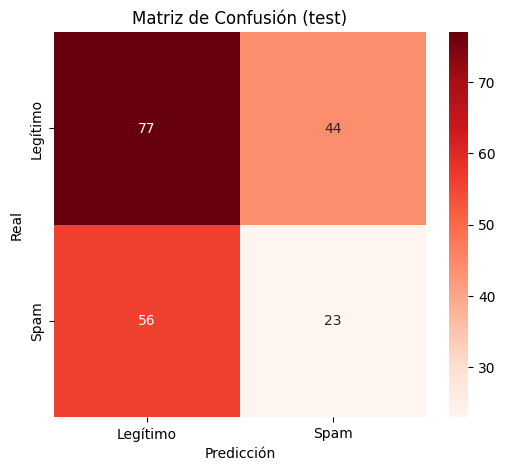

None

In [30]:
feature_map = zz_feature_map(number_of_features, reps=3)
ansatz = RealAmplitudes(num_qubits=number_of_features, entanglement="linear").decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0323
Iteración 2 - Loss: 1.0044
Iteración 3 - Loss: 1.0034
Iteración 4 - Loss: 1.0196
Iteración 5 - Loss: 1.0084
Iteración 6 - Loss: 1.0092
Iteración 7 - Loss: 1.0079
Iteración 8 - Loss: 1.0082
Iteración 9 - Loss: 1.0066
Iteración 10 - Loss: 1.0337
Iteración 11 - Loss: 0.9877
Iteración 12 - Loss: 1.0003
Iteración 13 - Loss: 0.9890
Iteración 14 - Loss: 0.9871
Iteración 15 - Loss: 0.9857
Iteración 16 - Loss: 0.9887
Iteración 17 - Loss: 0.9889
Iteración 18 - Loss: 0.9715
Iteración 19 - Loss: 0.9765
Iteración 20 - Loss: 0.9724
Tiempo total de entrenamiento: 0:03:51.008333
--- Resultados para entrenamiento ---
Accuracy: 0.5736
Precision: 0.4350
--- Resultados para test ---
Accuracy: 0.5750
Precision: 0.4211


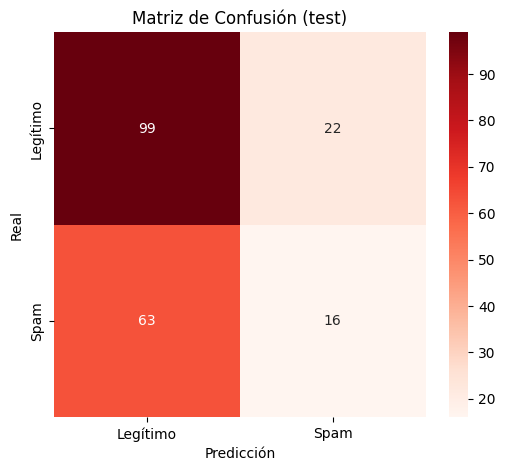

None

In [31]:
feature_map = zz_feature_map(number_of_features, reps=4)
ansatz = RealAmplitudes(num_qubits=number_of_features, entanglement="linear").decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)